# CMSE 201 Final Project Template

#### CMSE 201 Final Project
### &#9989; Brendan Garrow
### &#9989; Section_005
#### &#9989; 12/2/2024

# ___Alternative Fuels vs. The Gas Industry___

## Background and Motivation

_One of the largest arguments against Electric Vehicles (EVs) is their negative impact on the gasoline industry -- an important sector of the American economy. I wish to destigmatize EVs and prove to the average consumer that their next car does not have to be gas powered, and to do so with the datasets I intend to analyze in this project I will be answering the question "Does the expansion of alternative fueling station accessibility meaningfully impact the gasoline industry?"_

## Methodology

_To quantitatively measure the gasoline industry's health and the growth of alternative fuels I utilize two datasets, the FHWA Monthly Motor Fuel Sales Report for the former and The Alternative Fuels Data Center's Alternative Fueling Stations map for the latter._

_First, the necessary libraries were imported along with csv files of the datasets._

In [8]:
# Importing libraries & datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import threading

station_data = pd.read_csv('alt_fuel_stations (Nov 3 2024).csv', usecols=['State','Open Date','Country'])
gas_data = pd.read_csv('Monthly_Motor_Fuel_Sales_Reported_by_States__Selected_Data_from_FHWA_Monthly_Motor_Fuel_Report.csv', usecols=['fuel_type','abbrev','value','date'])

_After importing, we need to remove rows of unusable data from the Monthly Motor Report, henceforth refered to as the "Gas Dataset", namely rows that don't pertain to gasoline usage. For the Alternative Fueling Station dataset, henceforth refered to as the "Station Dataset", all non-US stations are removed as the gas dataset does not contain data for these regions._

In [10]:
# Cleaning up imported data
gas_data_clean = gas_data[gas_data.loc[:,'fuel_type'] == "Gasoline/gasohol"]

station_data_clean = station_data[station_data.loc[:,'Country'] == "US"]

station_data_clean = station_data_clean.dropna()

_This is then followed up by cleaning up the data to remove unusable or non-helpful data from the station dataset._

In [12]:
# Sorting alternative station data into a usable dataframe
# Creating the permanent station dataframe
station_stats = pd.DataFrame(columns=['Year','State','Stations'])
# Establishing the rows and columns
year = 2012
year_array = []
state_array = []
zero_array = []
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
while year <= 2023:
    for k in range(51):
        year_array.append(year)
        state_array.append(states[k])
        zero_array.append(0)
    year += 1

station_stats['Year'] = year_array
station_stats['State'] = state_array
station_stats['Stations'] = zero_array

stat_years = [ [] for _ in range(13) ]

# Sorts incoming data into arrays by year
def sort_years(clean_data):
    for stat_i in range(len(clean_data)):
        yr = clean_data.iloc[stat_i, 1][0:4]
        if (yr == "2012"):
            stat_years[0].append(clean_data.iloc[stat_i,0])
        elif (yr == "2013"):
            stat_years[1].append(clean_data.iloc[stat_i,0])
        elif (yr == "2014"):
            stat_years[2].append(clean_data.iloc[stat_i,0])
        elif (yr == "2015"):
            stat_years[3].append(clean_data.iloc[stat_i,0])
        elif (yr == "2016"):
            stat_years[4].append(clean_data.iloc[stat_i,0])
        elif (yr == "2017"):
            stat_years[5].append(clean_data.iloc[stat_i,0])
        elif (yr == "2018"):
            stat_years[6].append(clean_data.iloc[stat_i,0])
        elif (yr == "2019"):
            stat_years[7].append(clean_data.iloc[stat_i,0])
        elif (yr == "2020"):
            stat_years[8].append(clean_data.iloc[stat_i,0])
        elif (yr == "2021"):
            stat_years[9].append(clean_data.iloc[stat_i,0])
        elif (yr == "2022"):
            stat_years[10].append(clean_data.iloc[stat_i,0])
        elif (yr == "2023"):
            stat_years[11].append(clean_data.iloc[stat_i,0])
        elif (yr == "2024"):
            stat_years[12].append(clean_data.iloc[stat_i,0])

# Setup for multi-threading
stat1 = station_data_clean[:int(len(station_data_clean)/4)]
stat2 = station_data_clean[int(len(station_data_clean)/4):int(len(station_data_clean)/2)]
stat3 = station_data_clean[int(len(station_data_clean)/2):int(3*len(station_data_clean)/4)]
stat4 = station_data_clean[int(3*len(station_data_clean)/4):]

# Multithreading
t1 = threading.Thread(target=sort_years, args=(stat1, ))
t2 = threading.Thread(target=sort_years, args=(stat2, ))
t3 = threading.Thread(target=sort_years, args=(stat3, ))
t4 = threading.Thread(target=sort_years, args=(stat4, ))
t1.start()
t2.start()
t3.start()
t4.start()
t1.join()
t2.join()
t3.join()
t4.join()

# Iterate through years and corresponding states in stat_years // Optimized by ChatGPT
for year_index, states in enumerate(stat_years):
    # Calculate the corresponding year (starting from 2012)
    year = 2012 + year_index
    
    # Filter station_stats for the current year
    year_filter = station_stats['Year'] == year
    
    # Count occurrences of each state in the current year's states
    state_counts = pd.Series(states).value_counts()
    
    # Update station_stats for matching states and years
    for state, count in state_counts.items():
        state_filter = station_stats['State'] == state
        station_stats.loc[year_filter & state_filter, 'Stations'] += count

_After the station data is clean, the gas dataset must also be scrubbed._

In [14]:
# Sorting gas consumption data into a usable dataframe
# Re-ordering the gas dataset to be easier to sort
gas_stats = gas_data_clean.iloc[22:,:].rename(columns={"value": "Gallons", "date": "Month","fuel_type": "Year", "abbrev": "State"})
for k in range(len(gas_stats.iloc[:, 0])):
    gas_stats.iloc[k, 2] = gas_stats.iloc[k,1][6:10]
    gas_stats.iloc[k, 1] = gas_stats.iloc[k,1][0:2]

# Establishing the permanent gas dataframe
yearly_gas_stats = pd.DataFrame(columns=["Year", "State", "Gallons"])
yearly_gas_stats['Year'] = year_array
yearly_gas_stats['State'] = state_array
yearly_gas_stats['Gallons'] = zero_array

# Sorts incoming data into the proper state & year in the permanent dataframe
def loop_gas_stats(array, yearly):
    for k in range(len(array)):
        s_state = array.iloc[k,3]
        s_year = array.iloc[k,2]
        s_month = array.iloc[k,1]
        for i in range(len(yearly['State'])):
            y_state = yearly.iloc[i,1]
            y_year = yearly.iloc[i,0]
            if((s_state == y_state) and (str(s_year) == str(y_year))):
                yearly_gas_stats.iloc[i,2] += array.iloc[k,0]

# Setup for multithreading
stats1 = gas_stats[:int(len(gas_stats['Gallons'])/4)]
stats2 = gas_stats[int(len(gas_stats['Gallons'])/4):int(2*len(gas_stats['Gallons'])/4)]
stats3 = gas_stats[int(2*len(gas_stats['Gallons'])/4):int(3*len(gas_stats['Gallons'])/4)]
stats4 = gas_stats[int(3*len(gas_stats['Gallons'])/4):]

# Multithreading
t1 = threading.Thread(target=loop_gas_stats, args=(stats1, yearly_gas_stats, ))
t2 = threading.Thread(target=loop_gas_stats, args=(stats2, yearly_gas_stats, ))
t3 = threading.Thread(target=loop_gas_stats, args=(stats3, yearly_gas_stats, ))
t4 = threading.Thread(target=loop_gas_stats, args=(stats4, yearly_gas_stats, ))
t1.start()
t2.start()
t3.start()
t4.start()
t1.join()
t2.join()
t3.join()
t4.join()

# Cleaning up residual mess
yearly_gas_stats = yearly_gas_stats.iloc[:612]

_At this point, I realized where I needed to bring the datasets in order to effectively convey my message. I break up the states into regions to show different parts of America's reactions while keeping the total number of graphs to a minimum. I also set up combined datasets for each region to easier access related data. The regions are mostly related by geographic similarities, but I tried to break up the larger regions so each would have a similar number of states. A map of each region labeled is attached._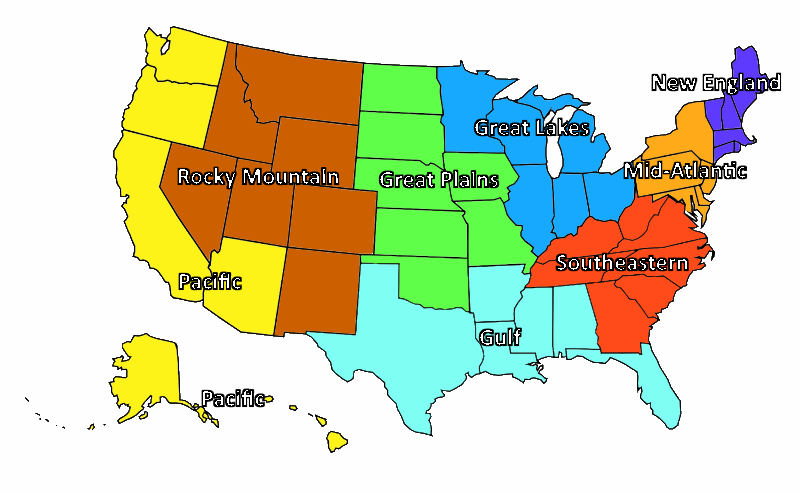

In [16]:
# Initializing a new dataset with both station and gas data
# Creating the regions
NE_States = ["ME", "VE", "NH", "MA", "RI", "CT"]
MA_States = ["NY", "NJ", "MD", "DE", "PA", "DC"]
GL_States = ["OH", "MI", "IN", "IL", "WI", "MN"]
GP_States = ["IA", "ND", "SD", "NE", "KS", "MO", "OK"]
SE_States = ["VA", "WV", "SC", "NC", "GA", "TN", "KY"]
GU_States = ["LA", "AR", "TX", "FL", "AL", "MS"]
PA_States = ["HI", "AL", "CA", "WA", "OR", "AZ"]
RO_States = ["ID", "MT", "NV", "UT", "WY", "CO", "NM"]  
State_Types = ["NE", "MA", "GL", "GP", "SE", "GU", "PA", "RO"]
# Creating the rows and columns of the empty datasets
Years = np.arange(2012, 2024, 1)
type_list = []
year_list = []
zero_list = []
for year in Years:
    zero_list.append(0)
    year_list.append(year)

# Individually initializing the region datasets
NE_list = pd.DataFrame(columns = ["Year", "State Type", "Gallons", "Stations Opened"])
MA_list = pd.DataFrame(columns = ["Year", "State Type", "Gallons", "Stations Opened"])
GL_list = pd.DataFrame(columns = ["Year", "State Type", "Gallons", "Stations Opened"])
GP_list = pd.DataFrame(columns = ["Year", "State Type", "Gallons", "Stations Opened"])
SE_list = pd.DataFrame(columns = ["Year", "State Type", "Gallons", "Stations Opened"])
GU_list = pd.DataFrame(columns = ["Year", "State Type", "Gallons", "Stations Opened"])
PA_list = pd.DataFrame(columns = ["Year", "State Type", "Gallons", "Stations Opened"])
RO_list = pd.DataFrame(columns = ["Year", "State Type", "Gallons", "Stations Opened"])
NE_list['Year'] = year_list
MA_list['Year'] = year_list
GL_list['Year'] = year_list
GP_list['Year'] = year_list
SE_list['Year'] = year_list
GU_list['Year'] = year_list
PA_list['Year'] = year_list
RO_list['Year'] = year_list
NE_list['Gallons'] = zero_list
NE_list['Stations Opened'] = zero_list
MA_list['Gallons'] = zero_list
MA_list['Stations Opened'] = zero_list
GL_list['Gallons'] = zero_list
GL_list['Stations Opened'] = zero_list
GP_list['Gallons'] = zero_list
GP_list['Stations Opened'] = zero_list
SE_list['Gallons'] = zero_list
SE_list['Stations Opened'] = zero_list
GU_list['Gallons'] = zero_list
GU_list['Stations Opened'] = zero_list
PA_list['Gallons'] = zero_list
PA_list['Stations Opened'] = zero_list
RO_list['Gallons'] = zero_list
RO_list['Stations Opened'] = zero_list
NE_list.loc[:, 'State Type'], MA_list.loc[:, 'State Type'], GL_list.loc[:, 'State Type'], GP_list.loc[:, 'State Type'], SE_list.loc[:, 'State Type'], GU_list.loc[:, 'State Type'], PA_list.loc[:, 'State Type'], RO_list.loc[:, 'State Type'] = "NE", "MA", "GL", "GP", "SE", "GU", "PA", "RO"

_Now I need to fill the empty combined datasets with data from the permanent datasets. This section looks kind of weird as it was originally set up as a multithreading cell, but I saw improvements in the computing speed when removing dual processing so decided to remove it._

In [18]:
# Filling in the new combined dataset
# Sorts gas data into the proper region dataframe
def form_gas_buckets(clean_data):
    for k in range(len(clean_data)):
        if(clean_data.loc[k, 'State'] in NE_States):
            for j in range(len(NE_list)):
                if NE_list.loc[j, 'Year'] == clean_data.loc[k, 'Year']:
                    NE_list.loc[j, 'Gallons'] += clean_data.loc[k, 'Gallons']
        elif(clean_data.loc[k, 'State'] in MA_States):
            for j in range(len(MA_list)):
                if MA_list.loc[j, 'Year'] == clean_data.loc[k, 'Year']:
                    MA_list.loc[j, 'Gallons'] += clean_data.loc[k, 'Gallons']
        elif(clean_data.loc[k, 'State'] in GL_States):
            for j in range(len(GL_list)):
                if GL_list.loc[j, 'Year'] == clean_data.loc[k, 'Year']:
                    GL_list.loc[j, 'Gallons'] += clean_data.loc[k, 'Gallons']
        elif(clean_data.loc[k, 'State'] in GP_States):
            for j in range(len(GP_list)):
                if GP_list.loc[j, 'Year'] == clean_data.loc[k, 'Year']:
                    GP_list.loc[j, 'Gallons'] += clean_data.loc[k, 'Gallons']
        elif(clean_data.loc[k, 'State'] in SE_States):
            for j in range(len(SE_list)):
                if SE_list.loc[j, 'Year'] == clean_data.loc[k, 'Year']:
                    SE_list.loc[j, 'Gallons'] += clean_data.loc[k, 'Gallons']
        elif(clean_data.loc[k, 'State'] in GU_States):
            for j in range(len(GU_list)):
                if GU_list.loc[j, 'Year'] == clean_data.loc[k, 'Year']:
                    GU_list.loc[j, 'Gallons'] += clean_data.loc[k, 'Gallons']
        elif(clean_data.loc[k, 'State'] in PA_States):
            for j in range(len(PA_list)):
                if PA_list.loc[j, 'Year'] == clean_data.loc[k, 'Year']:
                    PA_list.loc[j, 'Gallons'] += clean_data.loc[k, 'Gallons']
        elif(clean_data.loc[k, 'State'] in RO_States):
            for j in range(len(RO_list)):
                if RO_list.loc[j, 'Year'] == clean_data.loc[k, 'Year']:
                    RO_list.loc[j, 'Gallons'] += clean_data.loc[k, 'Gallons']

# Sorts station data into the proper region dataframe
def form_stat_buckets(clean_data):
    for k in range(len(clean_data)):
        if(clean_data.loc[k, 'State'] in NE_States):
            for j in range(len(NE_list)):
                if NE_list.loc[j, 'Year'] == clean_data.loc[k, 'Year']:
                    NE_list.loc[j, 'Stations Opened'] += clean_data.loc[k, 'Stations']
        elif(clean_data.loc[k, 'State'] in MA_States):
            for j in range(len(MA_list)):
                if MA_list.loc[j, 'Year'] == clean_data.loc[k, 'Year']:
                    MA_list.loc[j, 'Stations Opened'] += clean_data.loc[k, 'Stations']
        elif(clean_data.loc[k, 'State'] in GL_States):
            for j in range(len(GL_list)):
                if GL_list.loc[j, 'Year'] == clean_data.loc[k, 'Year']:
                    GL_list.loc[j, 'Stations Opened'] += clean_data.loc[k, 'Stations']
        elif(clean_data.loc[k, 'State'] in GP_States):
            for j in range(len(GP_list)):
                if GP_list.loc[j, 'Year'] == clean_data.loc[k, 'Year']:
                    GP_list.loc[j, 'Stations Opened'] += clean_data.loc[k, 'Stations']
        elif(clean_data.loc[k, 'State'] in SE_States):
            for j in range(len(SE_list)):
                if SE_list.loc[j, 'Year'] == clean_data.loc[k, 'Year']:
                    SE_list.loc[j, 'Stations Opened'] += clean_data.loc[k, 'Stations']
        elif(clean_data.loc[k, 'State'] in GU_States):
            for j in range(len(GU_list)):
                if GU_list.loc[j, 'Year'] == clean_data.loc[k, 'Year']:
                    GU_list.loc[j, 'Stations Opened'] += clean_data.loc[k, 'Stations']
        elif(clean_data.loc[k, 'State'] in PA_States):
            for j in range(len(PA_list)):
                if PA_list.loc[j, 'Year'] == clean_data.loc[k, 'Year']:
                    PA_list.loc[j, 'Stations Opened'] += clean_data.loc[k, 'Stations']
        elif(clean_data.loc[k, 'State'] in RO_States):
            for j in range(len(RO_list)):
                if RO_list.loc[j, 'Year'] == clean_data.loc[k, 'Year']:
                    RO_list.loc[j, 'Stations Opened'] += clean_data.loc[k, 'Stations']

# Calls the sorting functions
form_gas_buckets(yearly_gas_stats)
form_stat_buckets(station_stats)
# Puts all region datasets into a combined dataframe
frames = [NE_list, MA_list, GL_list, GP_list, SE_list, GU_list, PA_list, RO_list]
bucket_stats = pd.concat(frames)

## Results

_My findings at first appeared very telling and concerning, subverting my original expectations._

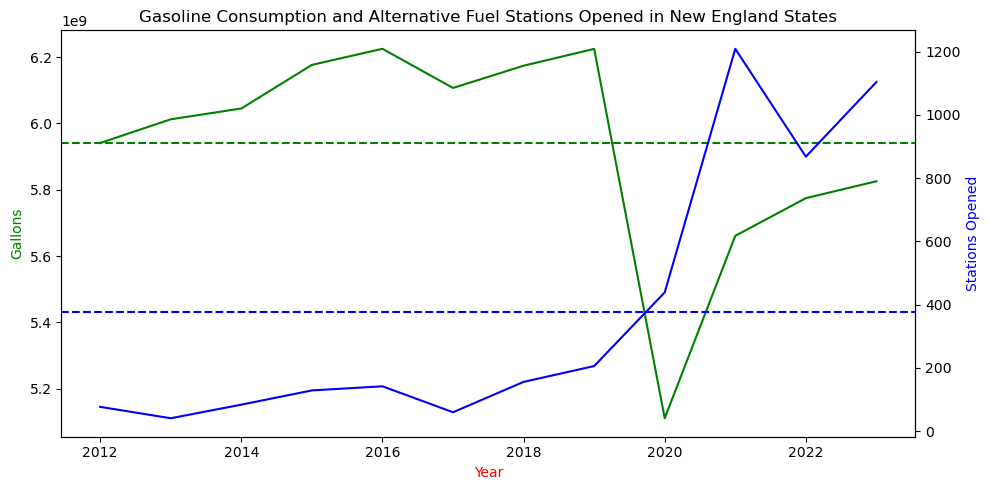

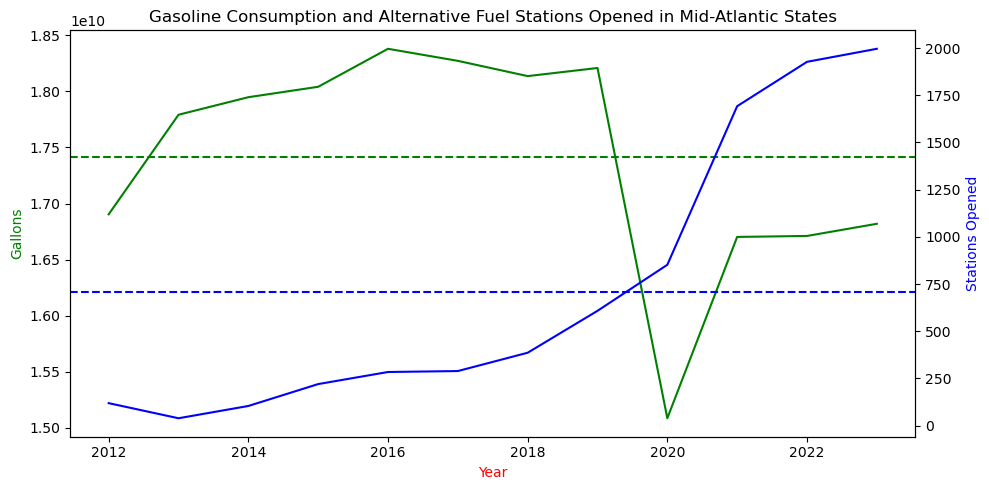

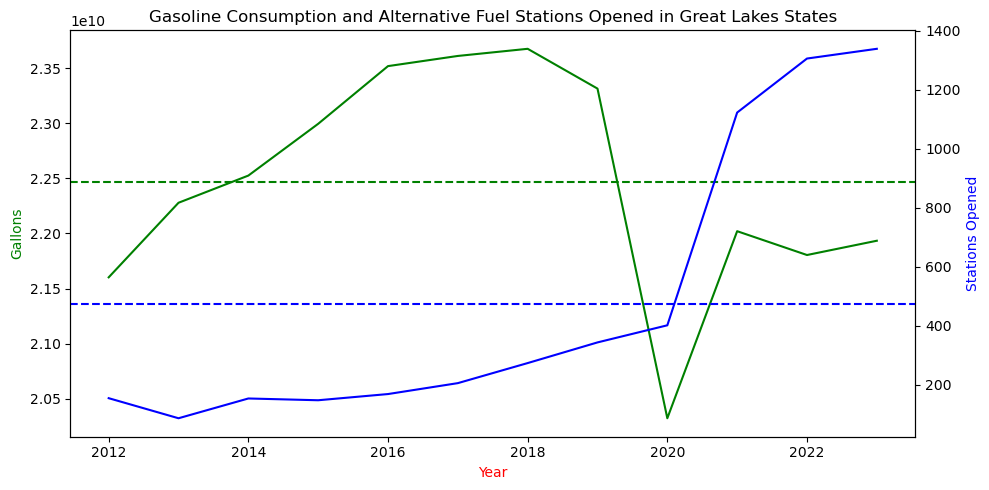

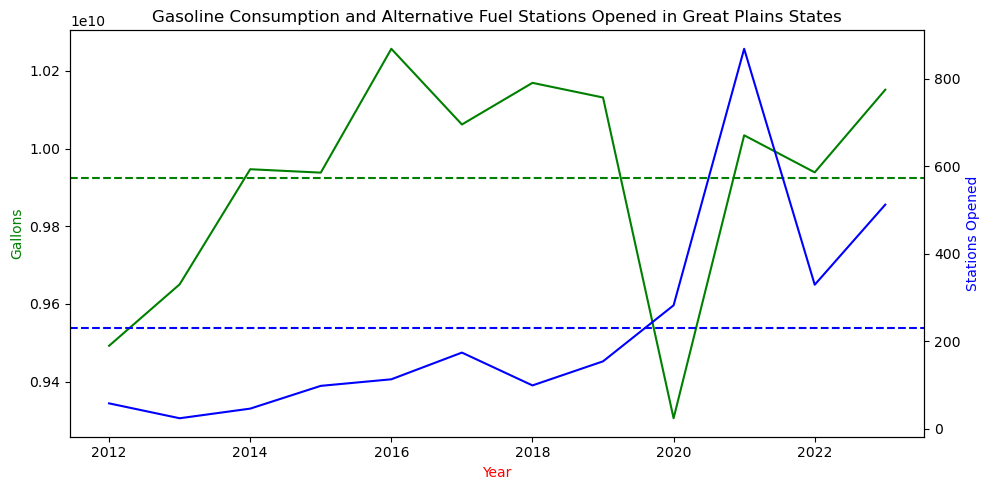

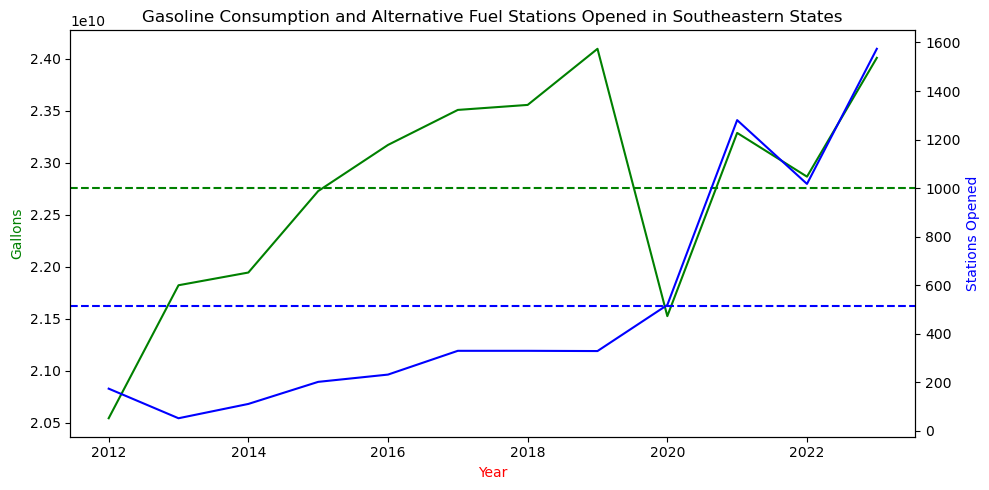

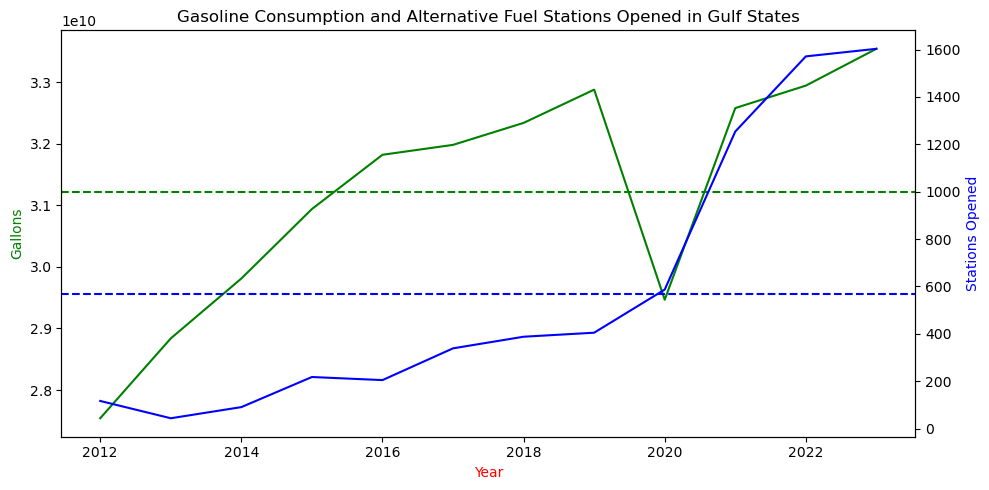

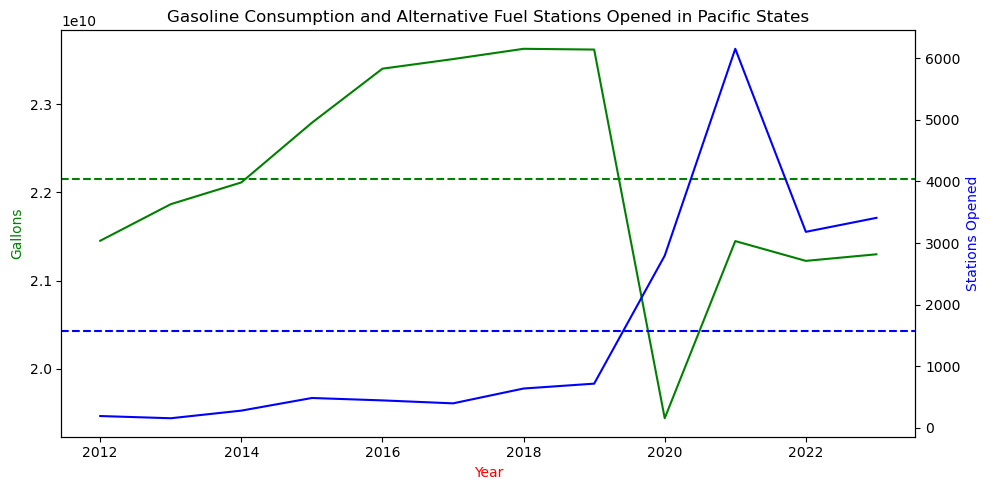

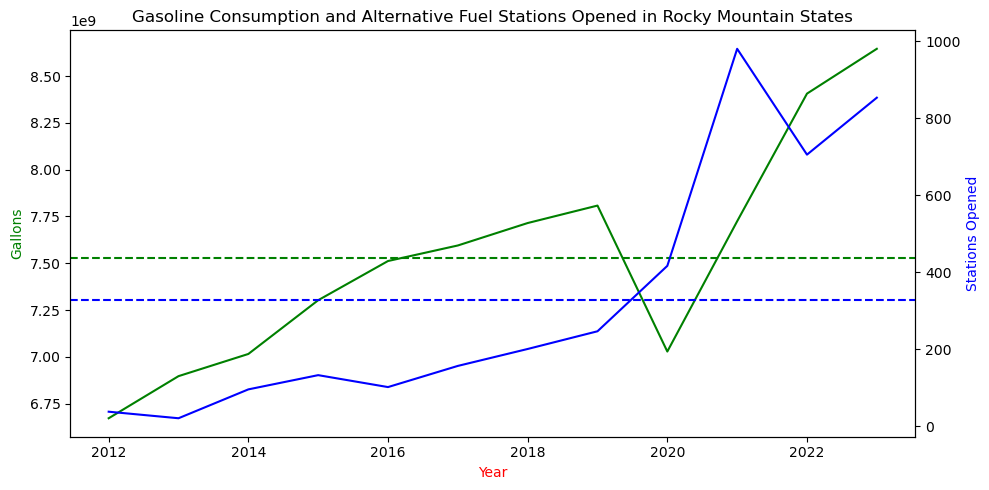

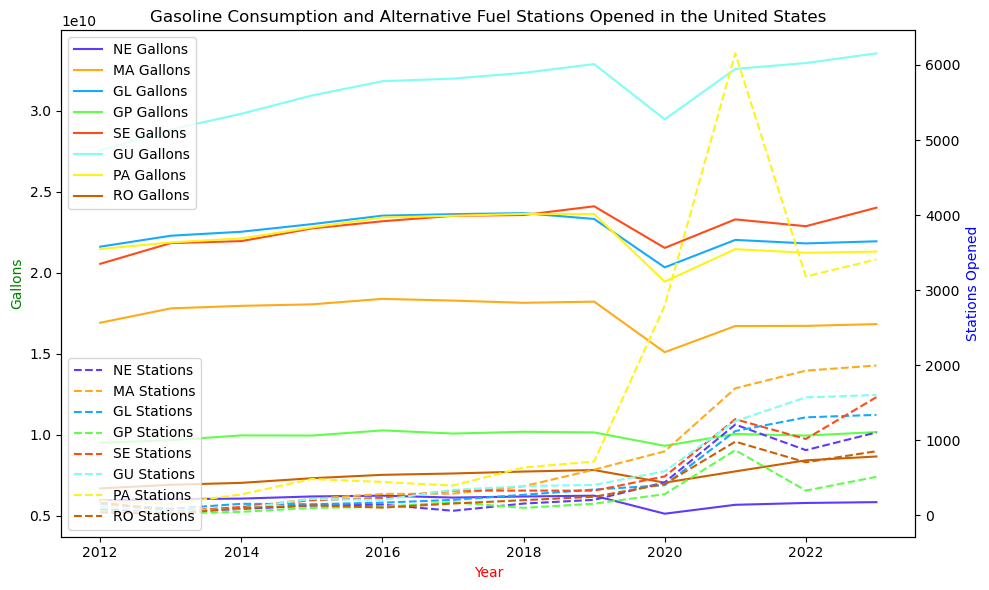

In [21]:
# Creating final graphs

def final_plot(abbrev, title):
    fig, ax = plt.subplots(figsize = (10, 5))
    plt.title('Gasoline Consumption and Alternative Fuel Stations Opened in '+title+' States')

    ax2 = ax.twinx() # Secondary Axis code provided by Geeks for Geeks // https://www.geeksforgeeks.org/how-to-add-a-y-axis-label-to-the-secondary-y-axis-in-matplotlib/
    ax.plot(bucket_stats[bucket_stats["State Type"]==abbrev].loc[:,"Year"], bucket_stats[bucket_stats["State Type"]==abbrev].loc[:,"Gallons"], label='Gallons', color = 'g')
    ax2.plot(bucket_stats[bucket_stats["State Type"]==abbrev].loc[:,"Year"], bucket_stats[bucket_stats["State Type"]==abbrev].loc[:,"Stations Opened"], label='Stations', color = 'b')
    ax.axhline(y=np.mean(bucket_stats[bucket_stats["State Type"]==abbrev].loc[:,"Gallons"]), color='g', linestyle='--')
    ax2.axhline(y=np.mean(bucket_stats[bucket_stats["State Type"]==abbrev].loc[:,"Stations Opened"]), color='b', linestyle='--')
    
    ax.set_xlabel('Year', color = 'r')
    ax.set_ylabel('Gallons', color = 'g')
    ax2.set_ylabel('Stations Opened', color = 'b')
    plt.tight_layout()
    plt.show()

# Northeast
final_plot("NE", "New England")

# Mid-Atlantic
final_plot("MA", "Mid-Atlantic")

# Great Lakes
final_plot("GL", "Great Lakes")

# Great Plains
final_plot("GP", "Great Plains")

# Southeast
final_plot("SE", "Southeastern")

# Gulf
final_plot("GU", "Gulf")

# Pacific
final_plot("PA", "Pacific")

# Rocky
final_plot("RO", "Rocky Mountain")

# Entire dataframe
fig, ax = plt.subplots(figsize = (10, 6))
plt.title('Gasoline Consumption and Alternative Fuel Stations Opened in the United States')

ax2 = ax.twinx()
# Colors for the list
colors = ["#5E3AFE", "#FEAA19", "#16A9FE", "#5FFE49", "#FE4B19", "#7FFEF4", "#FEF319", "#CC5F00"]
for k in range(len(colors)):
    ax.plot(bucket_stats[bucket_stats["State Type"]==State_Types[k]].loc[:,"Year"], bucket_stats[bucket_stats["State Type"]==State_Types[k]].loc[:,"Gallons"], label=str(State_Types[k]+' Gallons'), color = colors[k])
    ax2.plot(bucket_stats[bucket_stats["State Type"]==State_Types[k]].loc[:,"Year"], bucket_stats[bucket_stats["State Type"]==State_Types[k]].loc[:,"Stations Opened"], label=str(State_Types[k]+" Stations"), color = colors[k], linestyle='--')

ax.set_xlabel('Year', color = 'r')
ax.set_ylabel('Gallons', color = 'g')
ax2.set_ylabel('Stations Opened', color = 'b')
ax.legend(loc='upper left')
ax2.legend(loc='lower left')
plt.tight_layout()
plt.show()

_Given what the plots portray, it seems as though the construction of alternative fueling stations did have a measurable impact on the consumption of gasoline. It appears as though we must scale back investments into alternative fuel stations as it hurts one of our largest economic sectors._

## Discussion and Conclusion

_Despite what the graphs may lead on, it is unlikely that alternative fuel really made gas consumption hit an all time low. As absurd as this statement may sound given the data, this is a classic example of the saying "causation does not necessarily equal causation". Yes, 2020 does have a huge drop in gas consumption followed by a sudden jump in alternative fueling stations the next year, however gas consumption returns to normal in a majority of regions despite a continued investment in alternative fuel stations. Does this mean the sudden expansion of alternatives is what caused the consumption drop? Again, it is very unlikely that this is the case. It is important when reading data to know the context of the time at which the data was recorded. The sudden drop in consumption can be explained by the Covid-19 Pandemic that was at its height in 2020, where most people stayed home. As people stayed home, they drove less, consuming less gasoline. But that does not explain the sudden jump in alternative fuel stations, why is it that those took off during the pandemic? Another important date to take note of is Joseph Biden's inauguration, which occured in early 2021. One of Joe Biden's policies was the "Build Back Better" plan, which involved constructing EV charging stations across the US in record numbers._

_Looking at the data from all sides rather than just what is directly given will provide a more accurate conclusion, which in this case is that alternative fueling stations do not majorly impact or compete with the gasoline industry -- in all scenarios that gasoline consumption in 2023 was below average for the dataset, consumption was only down a maximum of 4%_

### References

[1] Department of Transportation, and Federal Highway Administration. “Monthly Motor Fuel Sales Reported by States: Selected Data from FHWA Monthly Motor Fuel Report.” https://Www.Fhwa.Dot.Gov/Policyinformation/Motorfuelhwy_trustfund.Cfm, 14 May 2024. <br>
[2] Department of Energy, and Alternative Fuels Data Center. “Alternative Fueling Station Locations.” https://Data.Openei.Org/Submissions/106, 21 May 2024. <br>
[3] “How to Add a Y-Axis Label to the Secondary Y-Axis in Matplotlib?” GeeksforGeeks, GeeksforGeeks, 4 Aug. 2022, www.geeksforgeeks.org/how-to-add-a-y-axis-label-to-the-secondary-y-axis-in-matplotlib/. 